# Введение в ансамбли

In [19]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import tree #деревья решений
from sklearn import ensemble #ансамбли
from sklearn import metrics #метрики

from sklearn.model_selection import train_test_split

In [20]:
diabetes_data = pd.read_csv('data/diabetes_cleaned.zip')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,29.9,0.210,50,0


In [21]:
#Создаем матрицу признаков X и столбец с ответами y
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

## Бэггинг. Случайный лес (Random Forest)

In [22]:
#Создаем объект класса случайный лес
rf = ensemble.RandomForestClassifier(
    n_estimators=300, #число деревьев
    criterion='entropy', #критерий эффективности
    max_depth=6, #максимальная глубина дерева
    max_features='sqrt', #число признаков из метода случайных подространств
    random_state=42 #генератор случайных чисел
)
#Обучаем модель 
rf.fit(X, y)

#Делаем предсказание класса
y_pred = rf.predict(X)
#Выводим отчет о метриках
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       493
           1       0.85      0.77      0.80       264

    accuracy                           0.87       757
   macro avg       0.86      0.85      0.85       757
weighted avg       0.87      0.87      0.87       757



In [23]:
rf.predict_proba(X)

array([[0.7186633 , 0.2813367 ],
       [0.85222366, 0.14777634],
       [0.88358167, 0.11641833],
       ...,
       [0.28908312, 0.71091688],
       [0.44280536, 0.55719464],
       [0.94476689, 0.05523311]])

In [24]:
rf.feature_importances_

array([0.07236181, 0.3335561 , 0.05629632, 0.07408006, 0.20732916,
       0.10627658, 0.15009997])

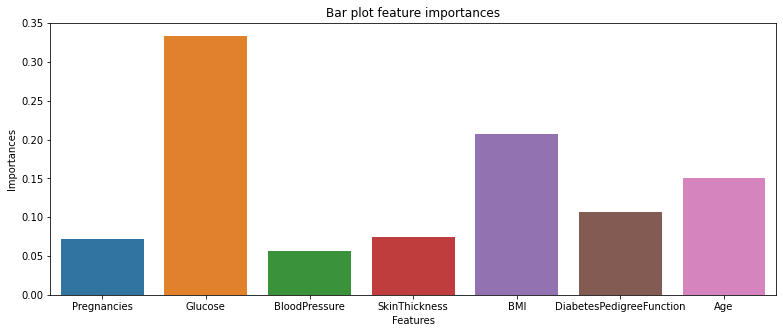

In [25]:
fig, ax = plt.subplots(figsize=(13, 5)) #фигура + координатная плоскость
feature = X.columns #признаки
feature_importances = rf.feature_importances_ #важность признаков
#Строим столбчатую диаграмму
sns.barplot(x=feature, y=feature_importances, ax=ax);
#Добавляем подпись графику, осям абцисс и ординат
ax.set_title('Bar plot feature importances')
ax.set_xlabel('Features')
ax.set_ylabel('Importances');

## Бустинг. Градиентный бустинг над деревьями решений (Gradient Boosting Decision Tree)

In [26]:
#Создаем объект класса градиентный бустинг над деревьями
gb = ensemble.GradientBoostingClassifier(
    loss='deviance', #функция потерь
    learning_rate=0.1, #темп обучения
    n_estimators=100, #число деревьев
    max_depth=3, #максимальная глубина дерева
    random_state=42 #генератор случайных чисел
)
#Обучаем модель 
gb.fit(X, y)

#Делаем предсказание класса
y_pred = gb.predict(X)
#Выводим отчет о метриках
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       493
           1       0.88      0.80      0.84       264

    accuracy                           0.89       757
   macro avg       0.89      0.87      0.88       757
weighted avg       0.89      0.89      0.89       757



In [27]:
gb.predict_proba(X)

array([[0.80581456, 0.19418544],
       [0.88860049, 0.11139951],
       [0.86515554, 0.13484446],
       ...,
       [0.12209833, 0.87790167],
       [0.4185027 , 0.5814973 ],
       [0.97977727, 0.02022273]])

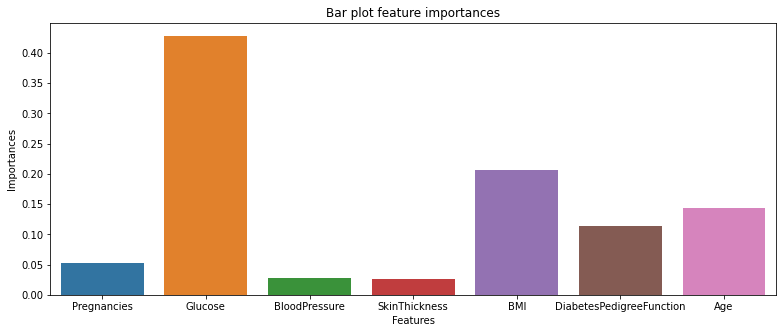

In [28]:
fig, ax = plt.subplots(figsize=(13, 5)) #фигура + координатная плоскость
feature = X.columns #признаки
feature_importances = gb.feature_importances_ #важность признаков
#Строим столбчатую диаграмму
sns.barplot(x=feature, y=feature_importances, ax=ax);
#Добавляем подпись графику, осям абцисс и ординат
ax.set_title('Bar plot feature importances')
ax.set_xlabel('Features')
ax.set_ylabel('Importances');

## Стекинг

In [169]:
#Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('dt', tree.DecisionTreeClassifier(
        criterion='entropy', #критерий информативности
        max_depth=6, #максимальная глубина дерева
        random_state=42 #генератор случайных чисел
        )
    ),
    ('rf', ensemble.RandomForestClassifier(
        n_estimators=300, #число деревьев в лесу
        criterion='entropy', #критерий информативности
        max_depth=6, #максимальная глубина дерева
        max_features='sqrt', #число признаков из метода случайных подространств
        random_state=42 #генератор случайных чисел
        )
    ),
    ('gb', ensemble.GradientBoostingClassifier(
        loss='deviance', #функция потерь
        learning_rate=0.1, #темп обучения
        n_estimators=100, #число деревьев
        max_depth=3, #максимальная глубина дерева
        random_state=42 #генератор случайных чисел
        )
    )
]

#Создаем объект класса стекинг
stack = ensemble.StackingClassifier(
    estimators,
    final_estimator=linear_model.LogisticRegression(random_state=42)
)
#Обучаем модель
stack.fit(X, y)

#Делаем предсказание класса
y_pred = stack.predict(X)
#Выводим отчет о метриках
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       493
           1       0.88      0.78      0.83       264

    accuracy                           0.89       757
   macro avg       0.89      0.86      0.87       757
weighted avg       0.89      0.89      0.89       757



In [170]:
stack.predict_proba(X)

array([[0.77918016, 0.22081984],
       [0.8703731 , 0.1296269 ],
       [0.87923479, 0.12076521],
       ...,
       [0.19183434, 0.80816566],
       [0.35304475, 0.64695525],
       [0.91552971, 0.08447029]])

In [171]:
meta_data = stack.transform(X)
#Создаем DataFrame
meta_df = pd.DataFrame(
    meta_data, #содержимое таблицы
    columns=['meta_feature1', 'meta_feature2', 'meta_feature2'] #название столбцов
)
meta_df.head()

,meta_feature1,meta_feature2,meta_feature2
0,0.25,0.281337,0.194185
1,0.10,0.147776,0.111400
2,0.10,0.116418,0.134844
3,0.00,0.179981,0.116678
4,0.00,0.451340,0.320725
